In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numba

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

In [2]:
def plot_statistics(stats: pd.DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Plot crater count
    ax = axes[0][0]
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_min)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_25_percentile)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_mean)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_75_percentile)
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area_max)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Observable Craters')

    # Plot crater count
    ax = axes[0][1]
    ax.plot(stats.n_craters_generated, stats.areal_density_min)
    ax.plot(stats.n_craters_generated, stats.areal_density_25_percentile)
    ax.plot(stats.n_craters_generated, stats.areal_density_mean)
    ax.plot(stats.n_craters_generated, stats.areal_density_75_percentile)
    ax.plot(stats.n_craters_generated, stats.areal_density_max)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Areal Density')

    # Plot Z statistic
    ax = axes[1][0]
    ax.plot(stats.n_craters_generated, stats.z_min)
    ax.plot(stats.n_craters_generated, stats.z_25_percentile)
    ax.plot(stats.n_craters_generated, stats.z_mean)
    ax.plot(stats.n_craters_generated, stats.z_75_percentile)
    ax.plot(stats.n_craters_generated, stats.z_max)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Z Statistic')

    # Plot Za statistic
    ax = axes[1][1]
    ax.plot(stats.n_craters_generated, stats.za_min)
    ax.plot(stats.n_craters_generated, stats.za_25_percentile)
    ax.plot(stats.n_craters_generated, stats.za_mean)
    ax.plot(stats.n_craters_generated, stats.za_75_percentile)
    ax.plot(stats.n_craters_generated, stats.za_max)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Za Statistic')

    plt.show()


In [3]:
def percentile(n):
    @numba.jit(forceobj=True, fastmath=True)
    def _percentile(x):
        return np.percentile(x, n)
    return _percentile

In [4]:
base_path = '/home/mason/output/'
filenames = [
    f'{base_path}/sim_run_1_3_0.4_1.5_{x}.txt'
    for x in range(35)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename)
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

In [5]:
columns_to_aggregate = [
    'n_craters_in_observation_area',
    'areal_density',
    'z',
    'za'
]
aggregations = {
    x: [
        'min',
        pd.NamedAgg(column=x, aggfunc=percentile(25)),
        'mean',
        pd.NamedAgg(column=x, aggfunc=percentile(75)),
        'max'
    ]
    for x in columns_to_aggregate
}
col_names = [
    [
        f'{x}_min',
        f'{x}_25_percentile',
        f'{x}_mean',
        f'{x}_75_percentile',
        f'{x}_max',
    ]
    for x in columns_to_aggregate
]
col_names = [y for x in col_names for y in x]

grouped = stats.groupby(['n_craters_generated']).agg(
    aggregations
)

grouped.columns = col_names
grouped.reset_index(inplace=True)

In [6]:
grouped[2000:2100]

,n_craters_generated,n_craters_in_observation_area_min,n_craters_in_observation_area_25_percentile,n_craters_in_observation_area_mean,n_craters_in_observation_area_75_percentile,n_craters_in_observation_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_min,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max
2000,2002,392,533.5,679.228571,826.5,936,0.194266,0.288948,0.339676,0.389416,...,-10.578637,-5.502659,-4.204720,-2.715754,-0.448090,-5.402290,3.290721,6.649594,8.696509,26.186353
2001,2003,393,534.5,679.971429,827.5,937,0.194270,0.288953,0.339715,0.389707,...,-10.451712,-5.477211,-4.173060,-2.761495,-0.431213,-5.247878,3.462195,6.696614,8.722242,26.407965
2002,2004,394,535.5,680.857143,828.5,938,0.194645,0.288962,0.339735,0.389720,...,-10.122259,-5.475976,-4.156640,-2.736908,-0.327717,-4.858519,3.430889,6.723532,8.827087,26.123512
2003,2005,395,536.5,681.685714,829.5,939,0.194647,0.288966,0.339790,0.390105,...,-9.897271,-5.410791,-4.119895,-2.715185,-0.361552,-4.590078,3.411541,6.776551,8.847950,26.186225
2004,2006,396,537.5,682.457143,826.5,940,0.194656,0.288967,0.339866,0.390114,...,-9.405677,-5.459638,-4.096823,-2.650283,-0.254590,-4.012590,3.532259,6.816047,8.996651,26.234791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2097,435,563.0,700.085714,846.0,999,0.202103,0.273640,0.339339,0.398270,...,-7.244852,-4.994666,-3.791274,-2.549636,-0.626901,-1.372215,3.785592,7.426555,9.203471,27.939271
2096,2098,436,564.0,700.714286,847.0,998,0.202110,0.276681,0.339535,0.398275,...,-7.006187,-5.000761,-3.765013,-2.511751,-0.506950,-1.287132,3.907540,7.471806,9.223047,28.002783
2097,2099,436,565.0,701.514286,848.0,998,0.202126,0.276721,0.339577,0.398298,...,-6.980762,-4.803591,-3.747485,-2.480752,-0.539564,-1.251007,3.913736,7.498751,9.145454,27.951022
2098,2100,437,566.0,702.342857,846.5,999,0.202129,0.276732,0.339689,0.398301,...,-7.040221,-4.830306,-3.714176,-2.450752,-0.381668,-1.176278,4.034092,7.551075,9.156186,28.090339


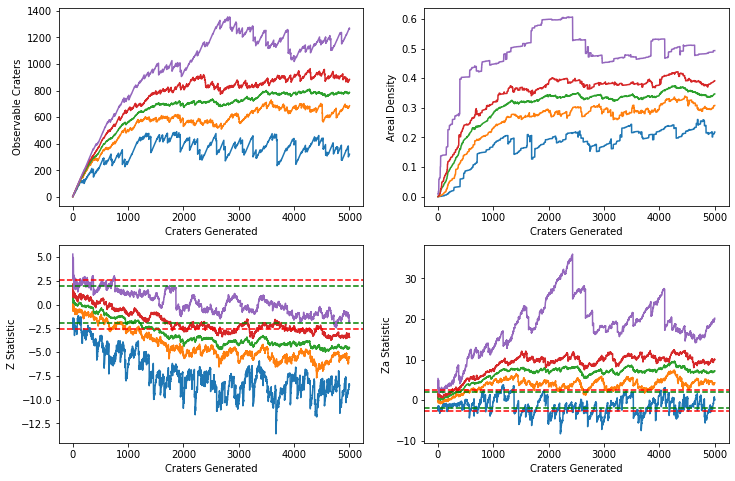

In [7]:
plot_statistics(grouped)

In [8]:
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in range(1, 55)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_generated', 'n_craters_in_observation_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

In [9]:
columns_to_aggregate = [
    'n_craters_in_observation_area',
    'areal_density',
    'z',
    'za'
]
aggregations = {
    x: [
        'min',
        pd.NamedAgg(column=x, aggfunc=percentile(25)),
        'mean',
        pd.NamedAgg(column=x, aggfunc=percentile(75)),
        'max'
    ]
    for x in columns_to_aggregate
}
col_names = [
    [
        f'{x}_min',
        f'{x}_25_percentile',
        f'{x}_mean',
        f'{x}_75_percentile',
        f'{x}_max',
    ]
    for x in columns_to_aggregate
]
col_names = [y for x in col_names for y in x]

grouped = stats.groupby(['n_craters_generated']).agg(
    aggregations
)

grouped.columns = col_names
grouped.reset_index(inplace=True)

In [10]:
grouped[2000:2100]

,n_craters_generated,n_craters_in_observation_area_min,n_craters_in_observation_area_25_percentile,n_craters_in_observation_area_mean,n_craters_in_observation_area_75_percentile,n_craters_in_observation_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_min,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max
2000,2000,333,655.0,753.648148,872.50,1047,0.165299,0.282893,0.317060,0.345133,...,-7.45,-4.3100,-3.163704,-1.9200,0.44,-0.70,4.7400,7.400741,9.9700,21.74
2001,2001,333,656.0,754.425926,873.00,1048,0.165302,0.282895,0.317158,0.345134,...,-7.48,-4.2650,-3.143889,-1.9825,0.38,-0.60,4.7225,7.435185,9.9625,21.66
2002,2002,334,657.0,755.222222,873.75,1049,0.165636,0.282909,0.317195,0.345140,...,-7.39,-4.2550,-3.117778,-1.9400,0.44,-0.35,4.6575,7.473148,10.0325,21.73
2003,2003,335,658.0,755.759259,874.00,1050,0.165639,0.282912,0.317389,0.347010,...,-7.39,-4.2125,-3.120185,-1.9150,0.37,-0.51,4.6850,7.484815,10.0225,21.78
2004,2004,336,659.0,756.481481,875.00,1051,0.165647,0.282936,0.317406,0.347019,...,-7.39,-4.2475,-3.114815,-1.8250,0.41,-0.35,4.5575,7.497222,10.0225,21.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2095,413,668.5,776.018519,890.75,1094,0.161294,0.264664,0.307838,0.350180,...,-9.11,-4.3575,-3.075556,-1.9525,0.07,-5.73,3.6550,7.301481,9.6100,18.43
2096,2096,414,669.5,773.944444,888.25,1095,0.161297,0.254281,0.307511,0.350229,...,-9.20,-4.4375,-3.092963,-1.8950,0.16,-5.83,3.6500,7.265370,9.7225,18.41
2097,2097,415,670.5,772.870370,889.25,1096,0.161297,0.254776,0.308260,0.350231,...,-8.92,-4.5400,-3.094630,-1.9575,0.31,-5.52,3.6300,7.289815,9.7950,18.43
2098,2098,416,671.5,772.259259,890.25,1097,0.161770,0.254872,0.308867,0.350316,...,-8.84,-4.5750,-3.103148,-1.9575,0.22,-5.41,3.5925,7.304815,9.8975,18.40


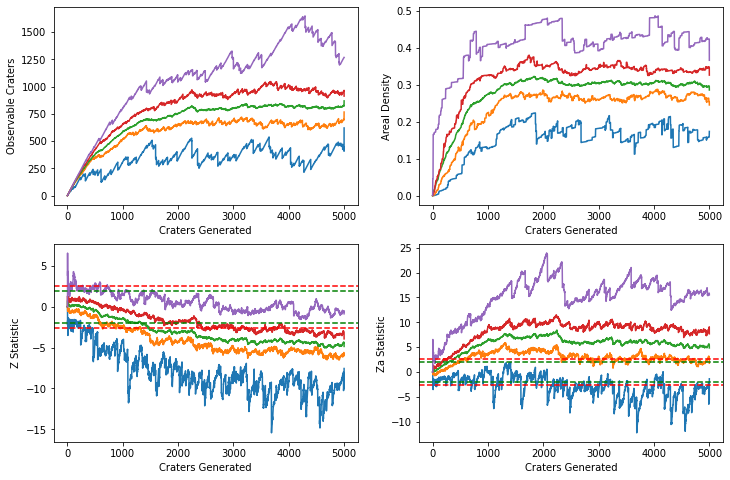

In [11]:
plot_statistics(grouped)